In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Problem Statement:
The business is experiencing high employee attrition rates, leading to increased recruitment costs, loss of experienced talent, and potential disruptions in productivity. A significant number of employees are leaving the company, necessitating a deeper understanding of the key factors influencing attrition. The business needs to determine how demographics (age, marital status), job-related factors (department, job satisfaction, work-life balance), and financial indicators (monthly income) impact employee retention. Identifying these drivers will help HR teams develop targeted retention strategies, enhance employee engagement, and ultimately reduce attrition rates.

Outcome: This analysis will provide actionable insights to HR and management on how to optimize employee retention, particularly by focusing on the specific needs and challenges within each department. It will also help identify the most critical factors that lead to attrition, enabling targeted interventions to improve employee satisfaction and reduce turnover.


In [2]:
df = pd.read_csv("Attrition Data.csv")

In [3]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [4]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [5]:
df.shape

(1470, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [7]:
df.drop(columns=['Education'], inplace=True)

In [8]:
df.isna().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

EDA

Distribution of Attrition

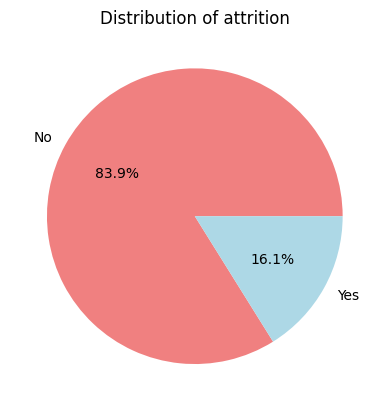

In [10]:
plt.pie(df['Attrition'].value_counts(),labels=df['Attrition'].value_counts().index,autopct='%1.1f%%',colors=['lightcoral', 'lightblue'])
plt.title('Distribution of attrition')
plt.show()

the above piechart reveals that 83.9% of employees have stayed ("No" attrition) and 16.1% have left ("Yes" attrition).

Attrition by Department

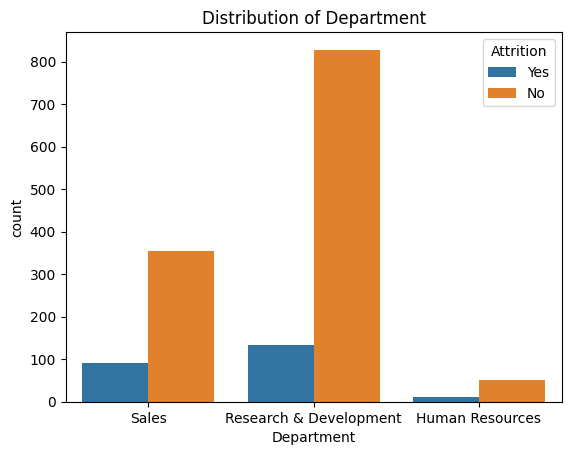

In [11]:
sns.countplot(x="Department",hue="Attrition",data =df)
plt.title("Distribution of Department")
plt.xlable="Department"
plt.ylabel="count"
plt.show()

The countplot reveals that the "Research & Development" department has the highest number of employees, with a significantly larger proportion staying ("No" attrition) compared to those leaving ("Yes" attrition). "Sales" has the second highest number of employees, also with more staying than leaving, while "Human Resources" has the fewest employees and a relatively higher proportion of attrition.

Attrition by Age Group

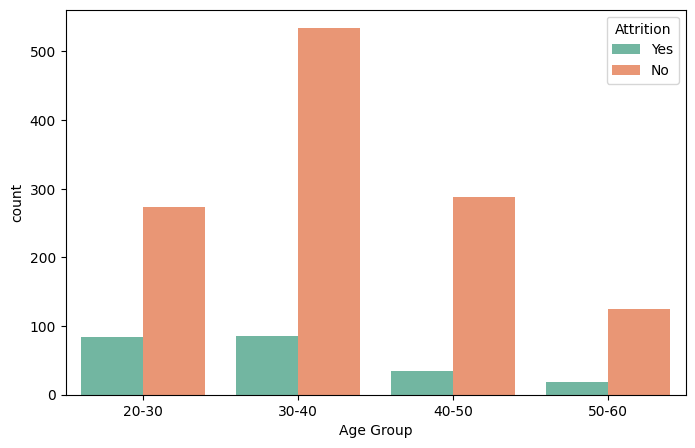

In [12]:
# Create Age Groups (Bins)
bins = [20, 30, 40, 50, 60]  # Define age ranges
labels = ['20-30', '30-40', '40-50', '50-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
plt.figure(figsize=(8,5))
sns.countplot(x="Age Group", hue="Attrition", data=df, palette="Set2")
plt.show()

The plot shows attrition broken down by age group, with the 30-40 age range having the highest count of both staying and leaving employees.

Attrition Distribution by Department and Age Group

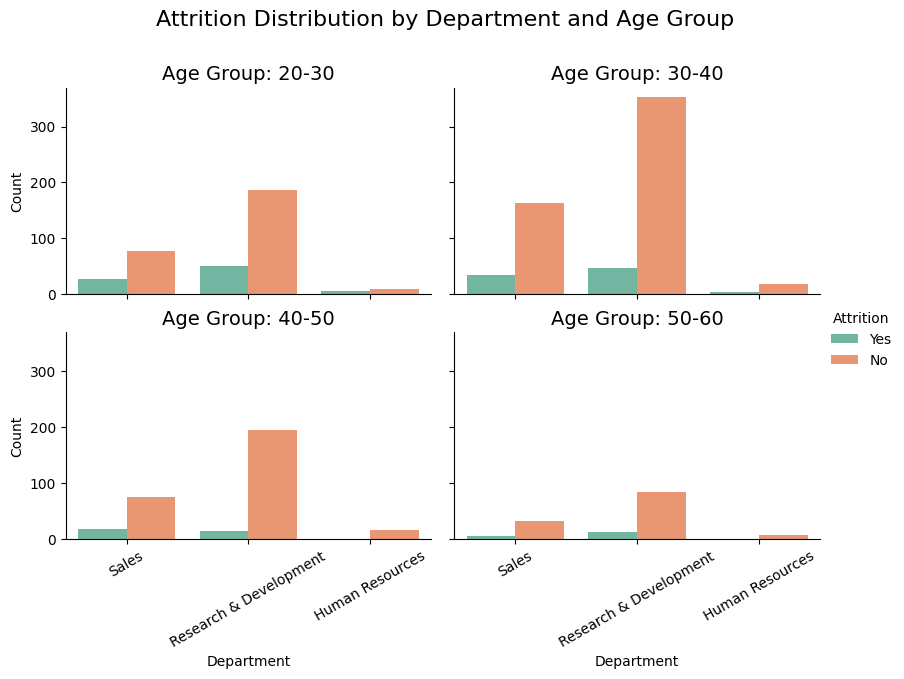

In [13]:
g = sns.catplot(x="Department", hue="Attrition", col="Age Group",
                data=df, kind="count", palette="Set2", height=3, aspect=1.4, col_wrap=2)  # Show 2 plots per row

# Increase font size
g.set_axis_labels("Department", "Count")
g.set_titles("Age Group: {col_name}", size=14)  # Increase title font size
g.fig.subplots_adjust(top=0.85)  # Adjust spacing
g.fig.suptitle("Attrition Distribution by Department and Age Group", fontsize=16)
# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Department", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=30, labelsize=10)  # Rotate x-axis labels for better readability

plt.show()

Attrition is highest in the 30-40 age group across all departments, particularly in Research & Development and Sales. Younger employees (20-30) in Sales also show a relatively high attrition rate compared to other departments and age groups.

Monthly Income Distribution by Department & Attrition

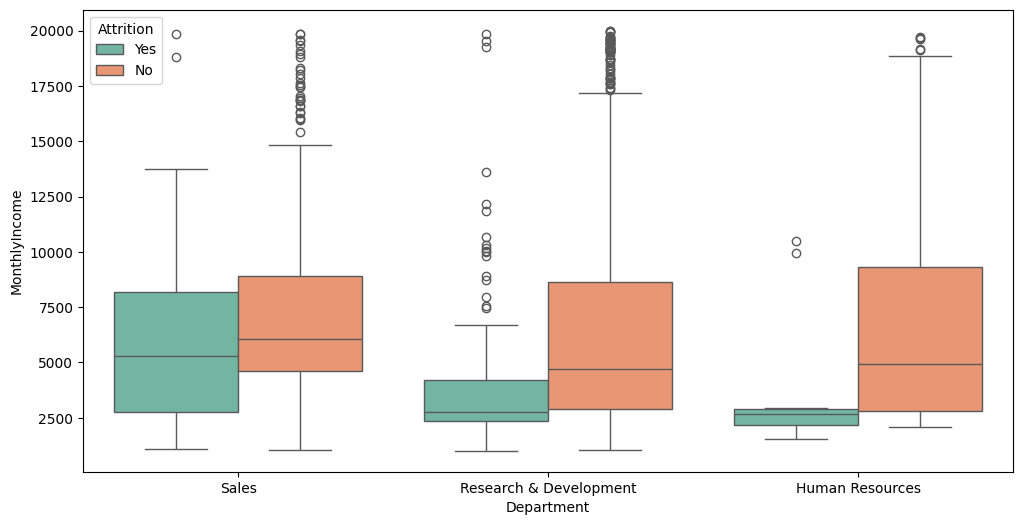

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df, palette="Set2")
plt.show()

So, based on income, it appears that lower-paid employees in Sales and Human Resources are more likely to leave. In Research & Development, while they have the highest earners, attrition is happening across the salary spectrum, suggesting factors other than just low pay might be at play.

Job Satisfaction by Department & Attrition

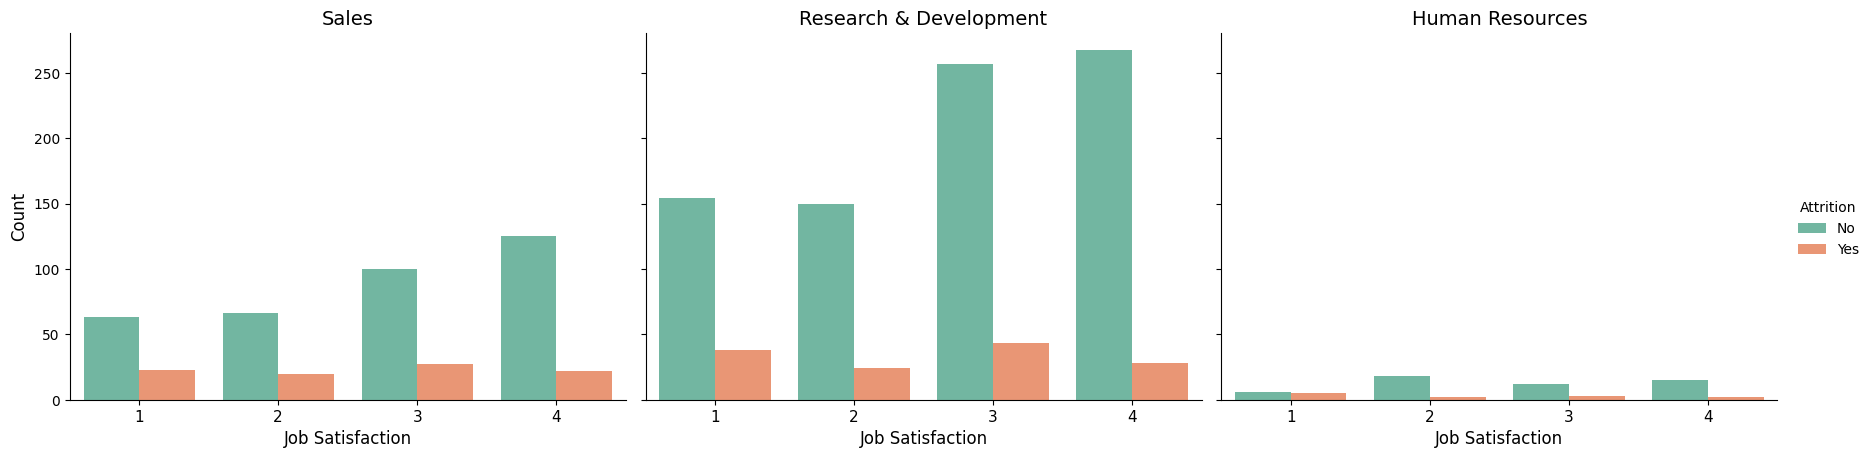

In [15]:
g = sns.catplot(x="JobSatisfaction", hue="Attrition", col="Department", data=df, kind="count", palette="Set2",
                height=5, aspect=1.2, col_wrap=3)  # Show multiple plots per row for departments
g.set_axis_labels("Job Satisfaction", "Count")
g.set_titles("{col_name}", size=14)  # Department title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing

# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Job Satisfaction", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', labelsize=11)  # Rotate x-axis labels for readability

plt.show()

Employees with lower work-life balance satisfaction are more likely to leave across all departments, but this trend is most pronounced in Research & Development. While Research & Development has the highest overall employee count, it also shows a significant number of employees leaving despite varying levels of work-life balance satisfaction.

Work-Life Balance by Department & Attrition

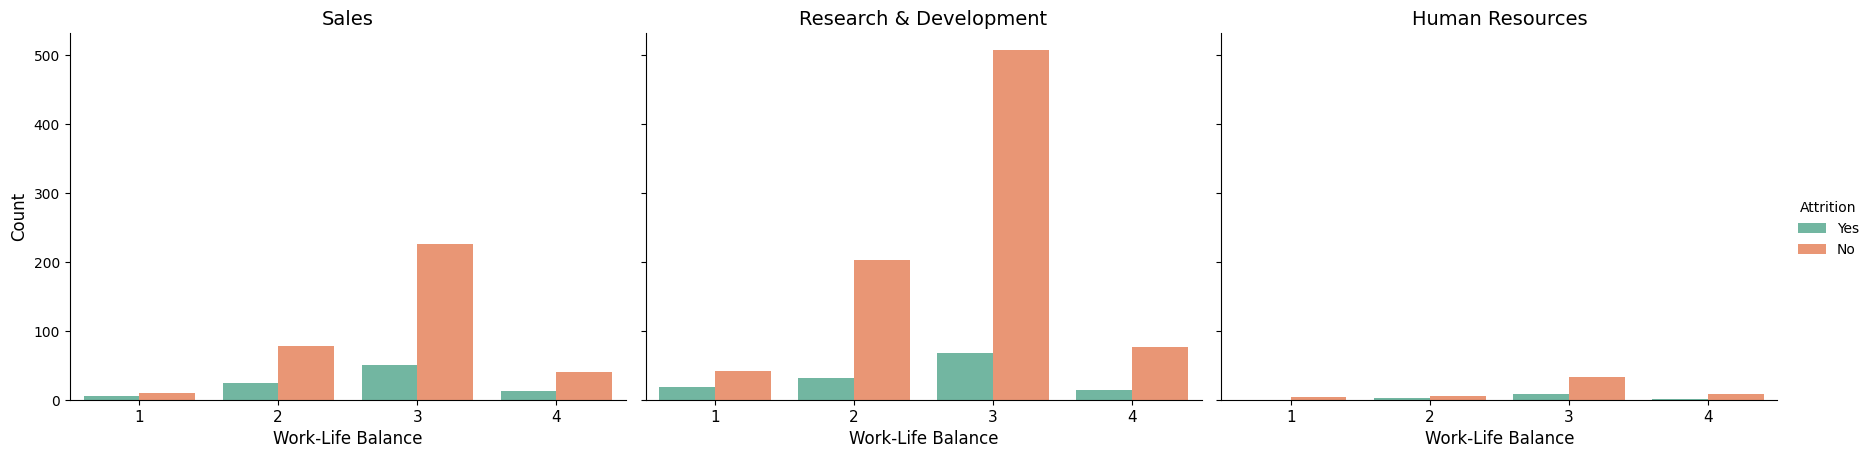

In [16]:
g = sns.catplot(x="WorkLifeBalance", hue="Attrition", col="Department", data=df, kind="count", palette="Set2",
                height=5, aspect=1.2, col_wrap=3)  # Show multiple plots per row for departments
g.set_axis_labels("Work-Life Balance", "Count")
g.set_titles("{col_name}", size=14)  # Department title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing

# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Work-Life Balance", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', labelsize=11)  # Rotate x-axis labels for readability

plt.show()

This chart shows the relationship between employee attrition (leaving the company) and their satisfaction with work-life balance, broken down by department. Employees reporting the lowest work-life balance satisfaction are the most likely to leave across all departments, with this trend being particularly noticeable in Research & Development and Sales.

Environment Satisfaction and Attrition

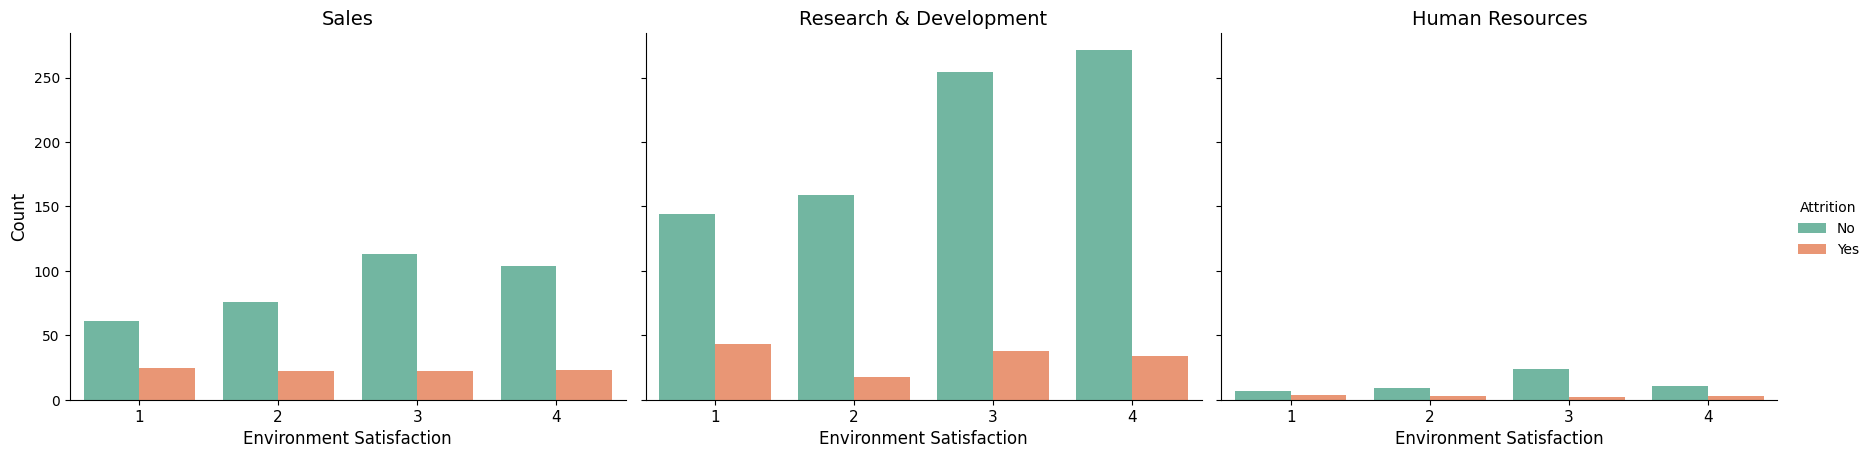

In [17]:
g = sns.catplot(x="EnvironmentSatisfaction", hue="Attrition", col="Department", data=df, kind="count", palette="Set2",
                height=5, aspect=1.2, col_wrap=3)  # Show multiple plots per row for departments
g.set_axis_labels("Environment Satisfaction", "Count")
g.set_titles("{col_name}", size=14)  # Department title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing

# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Environment Satisfaction", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', labelsize=11)  # Rotate x-axis labels for readability

plt.show()


This chart shows the relationship between employee attrition (leaving the company) and their environment satisfaction, broken down by department.

Similar to work-life balance, employees with lower environment satisfaction are more likely to leave, particularly in Sales and Research & Development, which also have the highest overall employee counts.

Distance from Home and Attrition

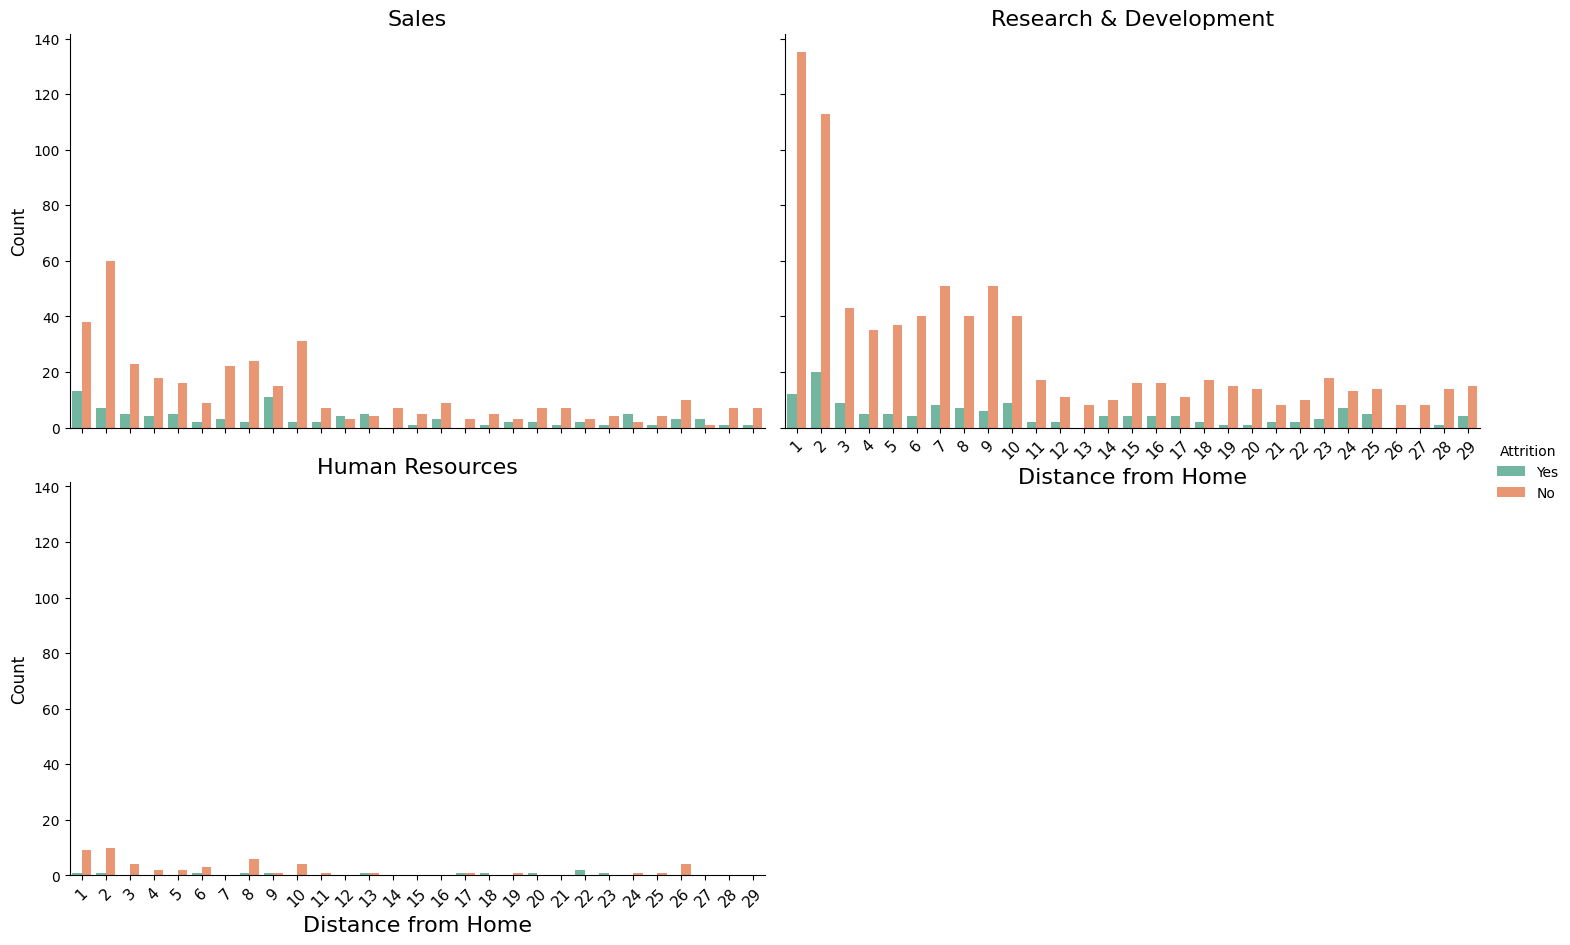

In [18]:
g = sns.catplot(x="DistanceFromHome", hue="Attrition", col="Department", data=df, kind="count", palette="Set2",
                height=5, aspect=1.5, col_wrap=2)  # Show multiple plots per row for departments
g.set_axis_labels("Distance from Home", "Count")
g.set_titles("{col_name}", size=16)  # Department title
g.fig.subplots_adjust(top=0.90)  # Adjust spacing

# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Distance from Home", fontsize=16)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=11)  # Rotate x-axis labels for readability

plt.show()


This chart shows the relationship between employee attrition (leaving the company) and the distance they live from the office, broken down by department.

While there's some variation, a general trend isn't strongly visible, suggesting that distance from home might not be a primary driver of attrition across these departments. However, in Sales, a slight increase in attrition might be observed for employees living furthest from the office.

Work Experience (NumCompaniesWorked) and Attrition



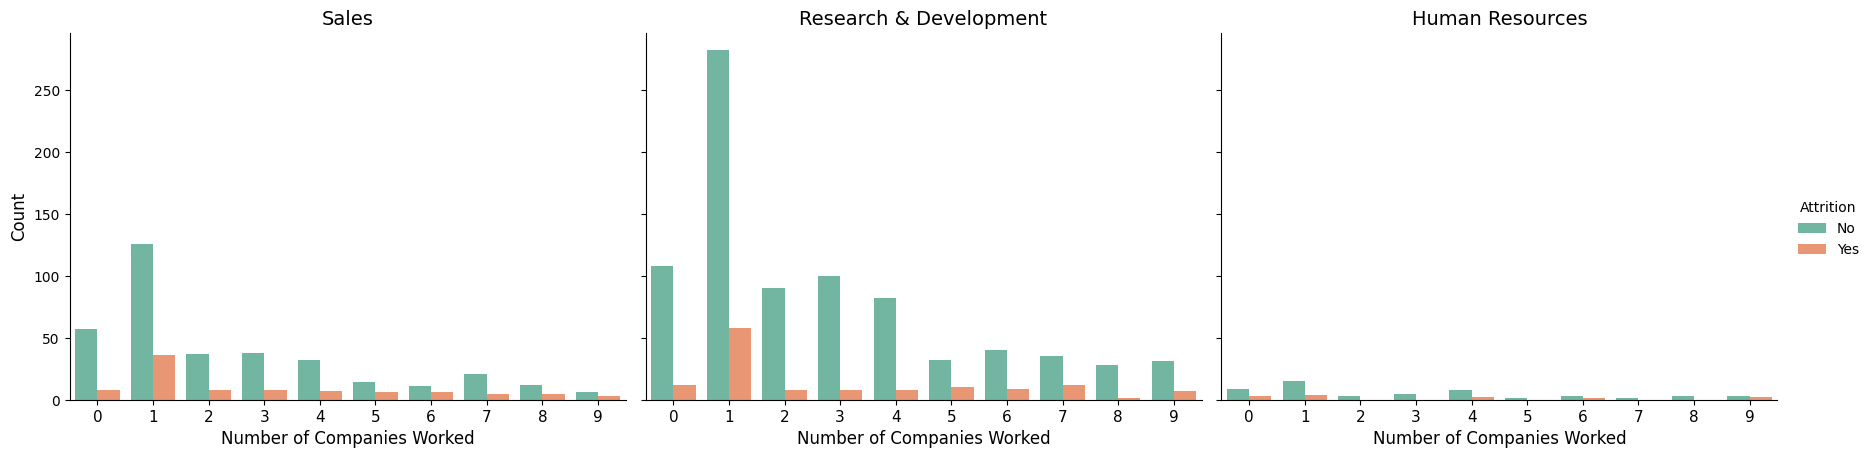

In [19]:
g = sns.catplot(x="NumCompaniesWorked", hue="Attrition", col="Department", data=df, kind="count", palette="Set2",
                height=5, aspect=1.2, col_wrap=3)  # Show multiple plots per row for departments
g.set_axis_labels("Number of Companies Worked", "Count")
g.set_titles("{col_name}", size=14)  # Department title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing

# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Number of Companies Worked", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x', labelsize=11)  # Rotate x-axis labels for readability

plt.show()

This chart shows the relationship between employee attrition and the number of companies they've worked for previously, broken down by department.

A noticeable trend is that employees who have worked for more companies tend to have higher attrition rates, especially in Sales and Research & Development. This suggests that prior job-hopping might be an indicator of higher turnover in these departments.

Marital Status and Attrition

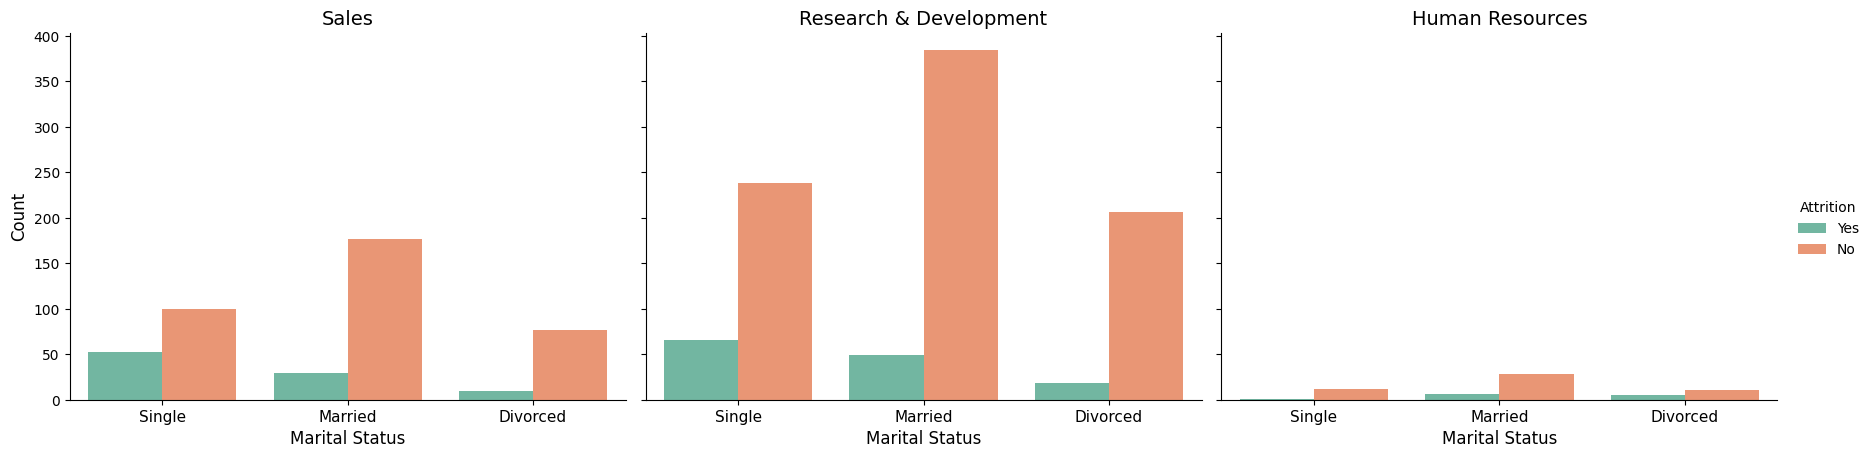

In [20]:
g = sns.catplot(x="MaritalStatus", hue="Attrition", col="Department", data=df, kind="count", palette="Set2",
                height=5, aspect=1.2, col_wrap=3)  # Show multiple plots per row for departments
g.set_axis_labels("Marital Status", "Count")
g.set_titles("{col_name}", size=14)  # Department title
g.fig.subplots_adjust(top=0.85)  # Adjust spacing

# Set font size for labels and ticks
for ax in g.axes.flat:
    ax.set_xlabel("Marital Status", fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(axis='x',labelsize=11)  # Rotate x-axis labels for readability

plt.show()

This chart shows the relationship between employee attrition and marital status, broken down by department.

While the "Married" status has the highest count of employees across all departments, Research & Development shows a relatively higher proportion of attrition among this group. "Single" employees also exhibit noticeable attrition, particularly in Sales and Research & Development, whereas "Divorced" employees have comparatively lower counts and attrition rates across the board.

**conclusion**

Overall, the analysis of employee attrition reveals a complex interplay of factors contributing to turnover. While the company-wide attrition rate is 16.1%, Research & Development (R&D) and Sales departments are particularly vulnerable. R&D, despite high salaries, experiences significant attrition among married employees and those in the 30-40 age group, suggesting issues beyond compensation, such as job satisfaction, work-life balance, and work environment are critical. Sales also struggles with attrition, notably among single, lower-paid employees and those with a history of frequent job changes. Across departments, low job satisfaction, poor work-life balance, and dissatisfaction with the work environment are strong predictors of attrition. While distance from home shows a limited impact, the 30-40 age group exhibits the highest attrition overall